In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import array as arr
from scipy import signal
from scipy.signal import find_peaks_cwt

In [2]:
geo = pd.read_csv("geography_industry.csv")

In [3]:
ca = geo[geo['state'] == 'CA']
ca.dropna(subset = ['industry'], axis = 0, inplace = True)
ca_max = ca.groupby('post_date', as_index = False, sort = False).max()
ca_mean = ca.groupby('industry', as_index = False, sort = False).mean().sort_values(by = ['count_id_indexed'], ascending = False)

dateNum = np.array(range(0, len(ca.index)))
ca['numeric_date'] = dateNum

values = np.array(ca_max.get('count_id_indexed'))
ca_mean

C:\Users\phuro\AppData\Local\Temp\ipykernel_5032\882919161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca.dropna(subset = ['industry'], axis = 0, inplace = True)
C:\Users\phuro\AppData\Local\Temp\ipykernel_5032\882919161.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca['numeric_date'] = dateNum


,industry,count_id_indexed
1,Construction,1.275624
14,Wholesale,1.145295
13,Transportation,1.059383
12,Services,1.059027
11,Retail,0.986698
5,Healthcare,0.962855
10,Real Estate,0.921410
7,Insurance,0.792206
2,Energy,0.789275
6,Hospitality,0.753749


,post_date,state,industry,count_id_indexed
471,6/15/2021,CA,Wholesale,1.2045


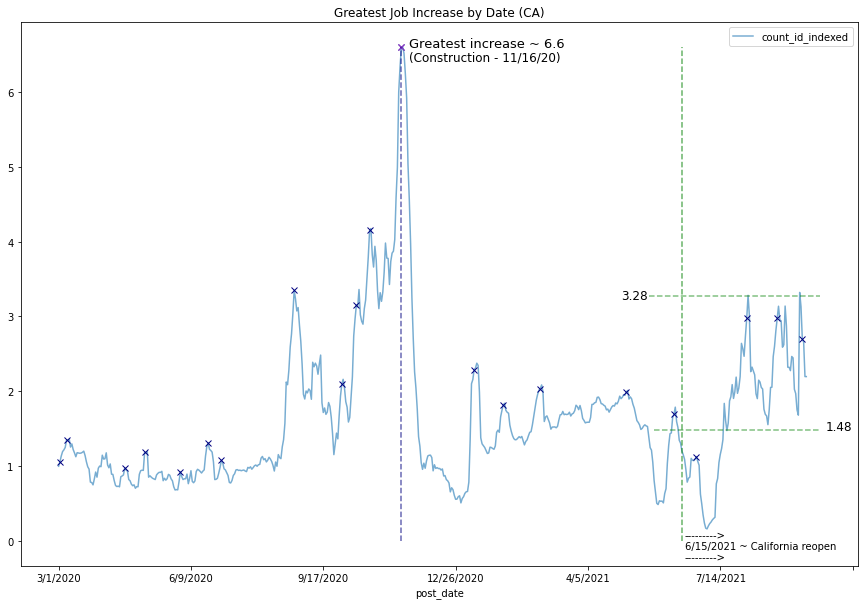

In [8]:
plt.rcParams["figure.figsize"] = (15, 10)

# ca_max

max_plot = ca_max.plot(kind = 'line', x = 'post_date', y = 'count_id_indexed', title='Greatest Job Increase by Date (CA)', \
                       alpha = 0.6)

peaks = find_peaks_cwt(values, widths=np.ones(values.shape)*2)-1
# plt.plot(values, 'm')
max_plot.plot(peaks, values[peaks], "x", color = 'navy')
max = ca_max.get('count_id_indexed').max()
_ = max_plot.annotate("Greatest increase ~ " + str(round(max, 2)), xy = (265, max), fontsize = 13)
_ = max_plot.annotate("(Construction - 11/16/20)", xy = (265, max - 0.18), fontsize = 12)
_ = max_plot.plot(259, max, "x", color = 'darkorchid')
_ = max_plot.vlines(x = 259, ymin = 0, ymax = max, color = 'navy', linestyle = 'dashed', alpha = 0.6)
_ = max_plot.vlines(x = 471, ymin = 0, ymax = max, color = 'green', linestyle = 'dashed', alpha = 0.6)
_ = max_plot.annotate("6/15/2021 ~ California reopen", xy = (473, -0.15 + 0.05), fontsize = 10)
_ = max_plot.annotate("--------->", xy = (473, 0.05), fontsize = 10)
_ = max_plot.annotate("--------->", xy = (473, -0.25), fontsize = 10)
_ = max_plot.hlines(y = values[peaks][18] + 0.3, xmin = 446, xmax = 575, color = 'green', linestyle = '--', alpha = 0.5)
_ = max_plot.hlines(y = values[peaks][18] - 1.5, xmin = 450, xmax = 575, color = 'green', linestyle = '--', alpha = 0.5)
_ = max_plot.annotate(str(round(values[peaks][18] + 0.3, 2)), xy = (425, values[peaks][18] + 0.25), fontsize = 12)
_ = max_plot.annotate(str(round(values[peaks][18] - 1.5, 2)), xy = (580, values[peaks][18] - 1.5), fontsize = 12)

# date = ca_max[ca_max['post_date'] == '11/16/2020'].get('post_date')
# plt.annotate("Point 1", xy = ('post_date', 6.5983))

# df = pd.DataFrame()
# df['x'] = ca['numeric_date']
# df['y'] = ca['count_id_indexed']
# df = df.set_index('x')
# df.plot(kind = 'line', y = 'y')
# df
# ca_max.get('post_date')
second_highest = values[peaks][18]
ca_max[ca_max['post_date'] == '6/15/2021']

In [5]:
max = ca_max.get('count_id_indexed').max()
min = ca_max.get('count_id_indexed').min()
# mean = ca_mean.get('count_id_indexed').max()

ca[ca['count_id_indexed'] == max|]

SyntaxError: invalid syntax (144309701.py, line 5)

In [ ]:
# ca_mean.set_index('industry', inplace = True)
# ca_mean.rename(columns = {'count_id_indexed' : 'average_count_id_indexed'}, inplace = True)
max_mean = ca_mean.get('average_count_id_indexed').max()
wholesale_mean = ca_mean.loc['Wholesale', 'average_count_id_indexed']
print(wholesale_mean)
mean_plot = ca_mean.plot(kind = 'barh', title = 'Average Changes in Job Count by Industry (CA)', alpha = 0.6);
_ = mean_plot.vlines(x = [max_mean], ymin = -0.5, ymax = 13.7, color = 'navy', linestyle = 'dashed')
_ = mean_plot.annotate("Highest average ~ " + str(round(max_mean, 2)), xy = (max_mean - 0.21, -0.1))
_ = mean_plot.vlines(x = [wholesale_mean], ymin = 0.8, ymax = 13.7, color = 'navy', linestyle = 'dashed')
_ = mean_plot.annotate("2nd highest average ~ " + str(round(wholesale_mean, 2)), xy = (wholesale_mean - 0.24, 0.9))
_ = mean_plot.yaxis.label.set_size(15)
_ = mean_plot.title.set_size(14)

In [184]:
ca_mean2 = ca_mean[0:2]
ca_mean2 = ca_mean2.plot(kind = 'barh', title = 'Expanding industries over the pandemic (CA)', alpha = 0.6);

,average_count_id_indexed
industry,
Construction,1.275624
Wholesale,1.145295
